## Dans ce notebook, Nous testons l'implementation des algorithmes de clustering: Fuzzy c-means, k-means et AWFCM sur différentes partitions. 

In [1]:

# to allow autoreload oµf projet.py
%load_ext autoreload
%autoreload 2
import numpy as np
import copy
from sklearn import preprocessing
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
import math
import time
from iads_a import kmoyennes as km
from iads_a import fuzz_clustering as fc
from tqdm import tqdm
from datetime import datetime as dt
import matplotlib.pyplot as plt
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color=colors[label])


ypts.shape

data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

data.shape[1]

df3 = pd.DataFrame(data,columns=['X','Y'])
df3.shape

(601, 2)

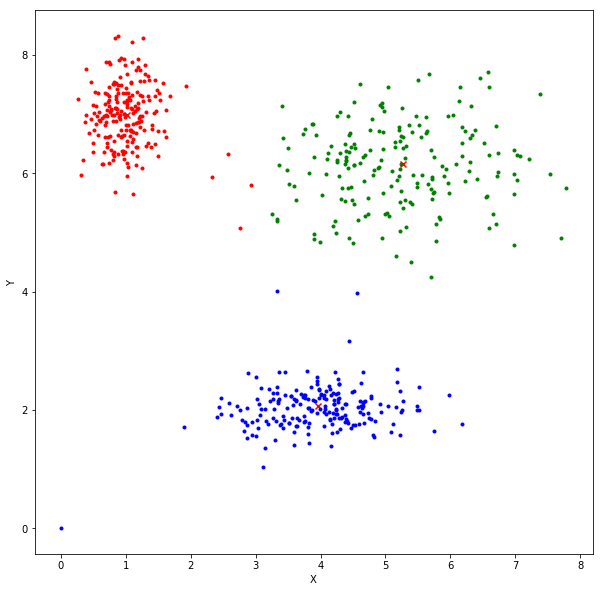

In [6]:
m, c, l, best,_ = fc.fuzzy_c_means(df3,3)
fc.affiche_resultat(df3,c, best)

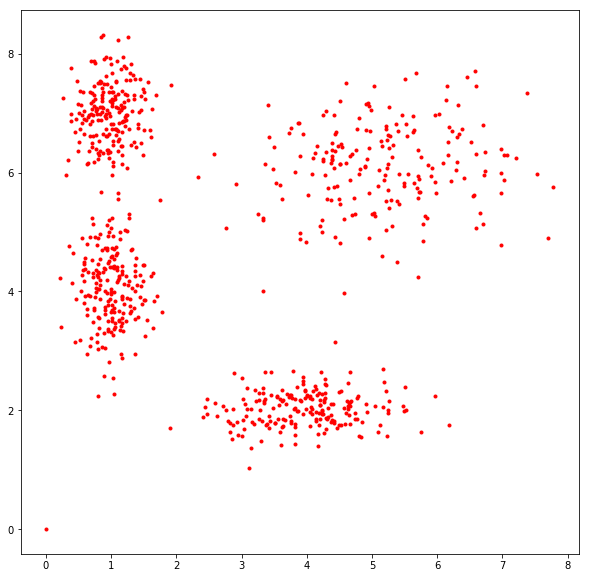

In [7]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6],
          [1,4]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7],
         [0.3,0.6]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(4):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color='r')


ypts.shape

data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

data.shape[1]

df3 = pd.DataFrame(data,columns=['X','Y'])
df3 = df3.iloc[1:]

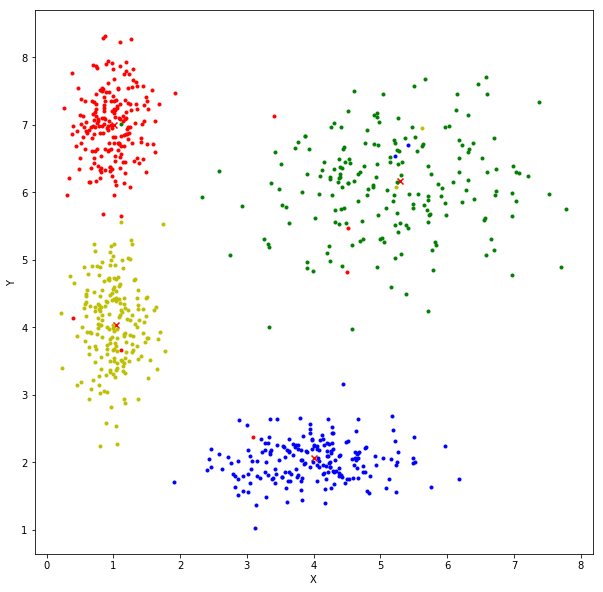

In [9]:
m, c, l, best,_ = fc.fuzzy_c_means(df3,4)
fc.affiche_resultat(df3,c, best)

In [10]:
centres_km, aff_km = km.kmoyennes(4,df3,0.05,100)

inertie gloabale = 1396.7481464773261
inertie gloabale = 1366.1609343348039
inertie gloabale = 1343.5823070075298
inertie gloabale = 1339.851754421199
inertie gloabale = 1338.9264396623519
inertie gloabale = 1337.816911788095
inertie gloabale = 1337.2949373483407
inertie gloabale = 1337.045439606484
inertie gloabale = 1336.9274315391747
inertie gloabale = 1336.808267475782
inertie gloabale = 1336.665024844379
inertie gloabale = 1336.481336127462
inertie gloabale = 1336.3587833941906
inertie gloabale = 1336.3242139354386
sortie apres 13  iterations


/home/celina/Bureau/Stage/iads_a/fuzz_clustering.py:126: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  data = df.loc[dic[k]]


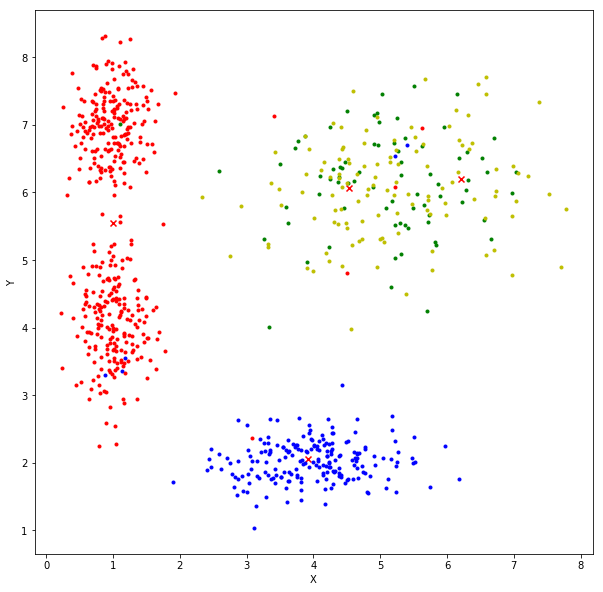

In [11]:
fc.affiche_resultat(df3,centres_km,aff_km)

In [13]:
nb = 0
for k, v in best.items():
    for i in v:
        if(i in aff_km[k]):
            nb += 1
print(nb*100/df3.shape[0],"% des points sont affectés au meme cluster dans les deux partitions")

100.0 % des points sont affectés au meme cluster dans les deux partitions


#### La méthode FCM est evidemment plus lente, en effet, pour chaque point et pour chaque dimension, elle effectue k multiplications (k etant le nombre de clusters) ajouté a cela le cout de l'exponentiation et du calcul de la matrice U.

In [123]:
dist_data_centroids = cdist(c.values, centres_km, metric="euclidean")

In [125]:
np.where(dist_data_centroids < 1)

(array([0, 1, 2]), array([1, 0, 2]))

In [15]:
for i in range(5):
    centres_km, _ = km.kmoyennes(3,df3,0.05,100)
    _, c, _, _ = fc.fuzzy_c_means(df3)
    dist_data_centroids = cdist(c.valuesy, centres_km, metric="euclidean")
    print(np.isclose(dist_data_centroids, np.zeros_like(dist_data_centroids),atol=0.1))

/home/celina/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


[[ True False False]
 [False  True False]
 [False False  True]]
[[ True False False]
 [False  True False]
 [False False  True]]
[[ True False False]
 [False  True False]
 [False False  True]]
[[ True False False]
 [False  True False]
 [False False  True]]
[[False  True False]
 [ True False False]
 [False False  True]]


**On remarque une stabilité au niveau de la distance entre les centres resultant de differentes executions des algorithmes fuzzy c-means et k-means.**

## Attribute Weighting Fuzzy c-Means

In [13]:
def _compute_memberships_bis_w(data, centroids, fuzzifier,weight):
    dist_data_centroids = np.empty(shape=(centroids.shape[0],data.shape[0]))
    for r in range(centroids.shape[0]):
        for i in range(data.shape[0]):
            dist_data_centroids[r][i] = euclidean(data.values[i],centroids.values[r],w=weight[r])
    tmp = np.power(dist_data_centroids, -2 / (fuzzifier - 1), where=dist_data_centroids != 0)
    big_sum = tmp.sum(axis=1, keepdims=True)
    res = np.divide(tmp, big_sum, where=big_sum != 0)
    aff = dict()
    # If an example is at the exact same coordinates than a centroid (euclidean distance == 0), set its membership to 1,
    # and the memberships of others to 0. See [3]
    # This is done by computing a mask of zeros elements' index of the `dist_data_centroids` matrix, then by performing
    # the operation cited above afterward.
    # These operations do nothing if `idx_rows_with_zero` is empty.
    idx_rows_with_zero = np.where(np.isclose(dist_data_centroids, 0))
    res[idx_rows_with_zero[0]] = 0
    res[idx_rows_with_zero] = 1

    res = np.fmax(res, 0.)  # Float manipulation sometimes cause a 0. to be set to -0
    d = np.argmax(res,axis=1)
    for i in range(len(d)):
        if d[i] in  aff:
            aff[d[i]].append(i)
        else:
            aff[d[i]] = [i]
    return res, aff
def compute_memberships_w(data, centroids, m,w):
    u_ir = np.zeros(shape=(data.shape[0], centroids.shape[0]))
    affectation = dict()
    for i in range(data.shape[0]):
        for r in range(centroids.shape[0]):
            d_ir = np.sqrt(((w[r]**2)*((data.iloc[i] - centroids.iloc[r]) ** 2)).sum())
            if d_ir == 0:
                for s in range(centroids.shape[0]):
                    u_ir[i][s] = 0
                u_ir[i][r] = 1
                break

            big_sum = 0
            for s in range(centroids.shape[0]):
                d_is = np.sqrt(((w[s]**2)*((data.iloc[i] - centroids.iloc[s]) ** 2)).sum())
                if d_is == 0:
                    # The point is at the same position of the centroids, set it's distance to 0
                    continue
                big_sum += (d_ir / np.sqrt(((data.iloc[i] - centroids.iloc[s]) ** 2).sum())) ** (2 / (m - 1))
            u_ir[i][r] = 1 / big_sum
        d=np.argmax(u_ir[i])
        if d in affectation:
            affectation[d].append(i)
        else:
            affectation[d] = [i]
    return u_ir, affectation

In [14]:
def s(r, s, x, c, u, m=2):
    sum_ = 0
    for i in range(x.shape[0]):
        sum_ += (u[i][r]**m)*(x.iloc[i][s] - c.iloc[r][s])**2
    return np.sqrt(sum_)

def compute_loss_w(data, memberships, centroids, fuzzifier,weight):
    cost = 0
    ms = memberships ** fuzzifier

    dist_data_centroids = np.empty(shape=(data.shape[0],centroids.shape[0]))
    for i in range(data.shape[0]):
        for r in range(centroids.shape[0]):
            dist_data_centroids[i][r] = euclidean(data.values[i],centroids.values[r],w=weight[r])
    sum_ = np.sum(ms*dist_data_centroids, axis=1)
    cost = np.sum(sum_, axis=0)
        
    return cost

def compute_weights(data, memberships, m, centroids):
    w = np.full(shape=(centroids.shape[0],data.shape[1]),fill_value=1.)
    memberships_fuzz = memberships ** m

    for r in range(centroids.shape[0]):
        sum_ = np.sum([np.power(s(r,q,data,centroids,memberships),-2/m-1, where =s(r,q,data,centroids,memberships)!=0) for q in range(centroids.shape[1])])
        for p in range(centroids.shape[1]):
            w[r][p] = np.divide(np.power(s(r,p,data,centroids,memberships), -2/m-1, where = s(r,p,data,centroids,memberships)!=0),sum_,where=sum_!=0)
    return w
def compute_centroids(data, memberships, fuzzifier):
    c = np.full(shape=(memberships.shape[1],data.shape[1]), fill_value=1.)
    fuzzified_memberships = memberships ** fuzzifier
    for r in range(memberships.shape[1]):
        sum_ = np.sum(fuzzified_memberships[:,r])
        for p in range(data.shape[1]):
            sum_b = np.sum([fuzzified_memberships[i][r]*data.iloc[i][data.columns[p]] for i in range(data.shape[0])])
            c[r][p] = sum_b/1.0*sum_
    return pd.DataFrame(c,columns=data.columns)

In [15]:
def fuzzy_c_means_w(data, nb_clusters=2, eps=1e-4, max_iter=300, fuzzifier=2):

    centroids = fc.initialization(data, nb_clusters)
    best_memberships = None
    best_aff = None
    best_w = None
    best_centroids = None
    best_loss = np.inf
    memberships = None
    current_iter = 0
    losses = []
    w = np.full(shape=(centroids.shape[0],data.shape[1]),fill_value=1.)
    while (current_iter < max_iter) and \
        ((current_iter < 2) or (abs(losses[-2] - losses[-1]) > eps)):
        memberships, aff = compute_memberships_w(data, centroids, fuzzifier,w)
        w = compute_weights(data,memberships,fuzzifier,centroids)
        centroids = fc._compute_centroids(data, memberships, fuzzifier)
        loss = compute_loss_w(data, memberships, centroids, fuzzifier,w)
        losses.append(loss)
        if loss < best_loss:
            best_loss = loss
            best_memberships = memberships
            best_centroids = centroids
            best_aff = aff
            best_w = w
        current_iter += 1
    return best_memberships, best_centroids, np.array(losses), best_aff, best_w

In [29]:
df2.columns[1]

'Y'

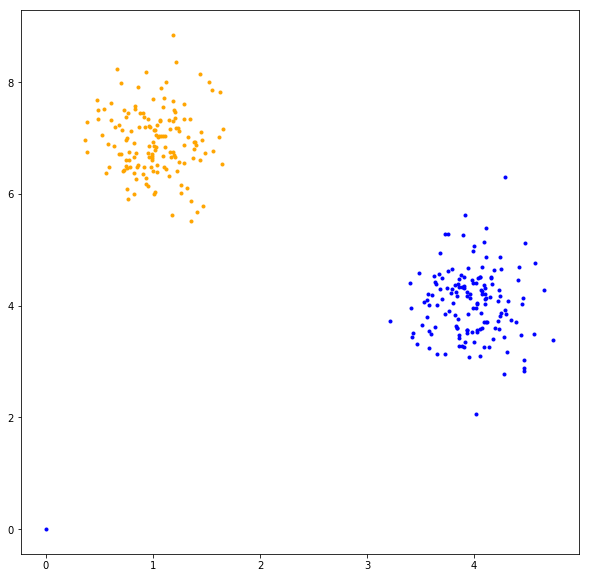

In [16]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 4],
           [1, 7]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.3, 0.6],
          [0.3, 0.6]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(150) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(150) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(150) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color=colors[label])



data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

data.shape[1]

df2 = pd.DataFrame(data,columns=['X','Y'])


In [9]:
df2 = df2.iloc[1:]
df2.head()

,X,Y
1,4.149014,4.150296
2,3.958521,4.207869
3,4.194307,3.591985
4,4.456909,4.139352
5,3.929754,4.175843


In [2]:
0.66800793 + 0.20

0.8680079300000001

In [3]:
1 - 0.8680079300000001

0.1319920699999999

In [17]:
best_memberships, best_centroids, _, aff, w = fuzzy_c_means_w(df2)

In [18]:
w

array([[0.93568854, 0.06431146],
       [0.53827965, 0.46172035]])

In [16]:
best_centroids

,X,Y
0,0.999359,6.765146
1,3.755889,2.239590


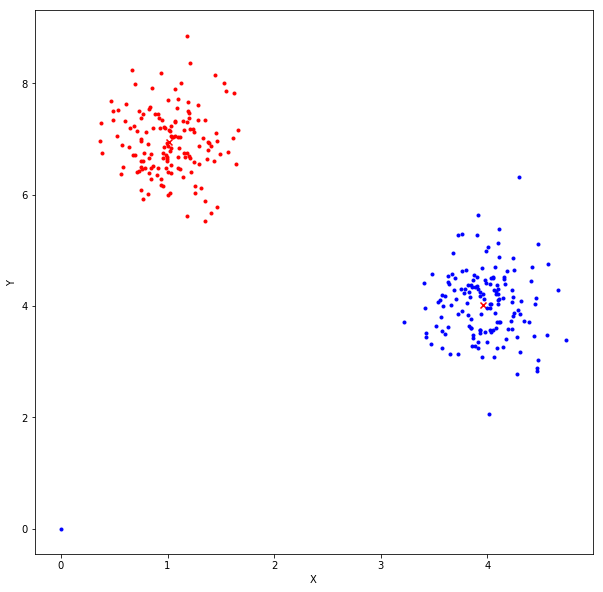

In [19]:
m, c, l, best,_ = fc.fuzzy_c_means(df2,2)
fc.affiche_resultat(df2,c, best)

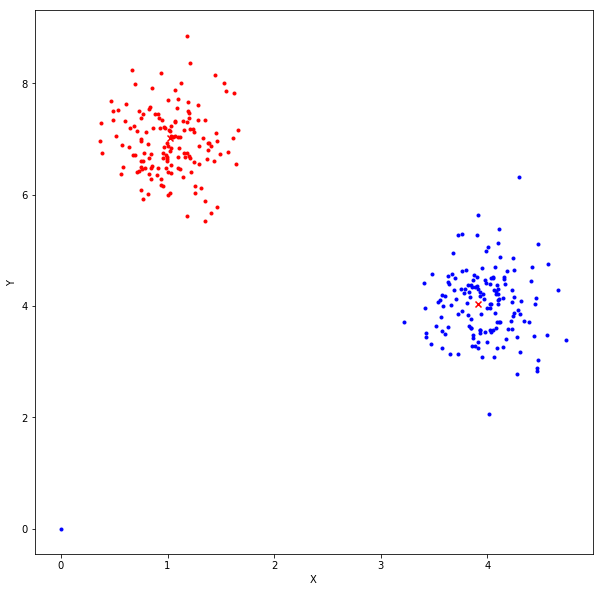

In [20]:
fc.affiche_resultat(df2,best_centroids,aff)

In [21]:
dft = pd.read_csv('data.csv')

In [22]:
dft.head()

,X,Y
0,13.496714,8.648168
1,12.861736,7.229835
2,13.647689,6.646156
3,14.523030,9.223353
4,12.765847,10.061999


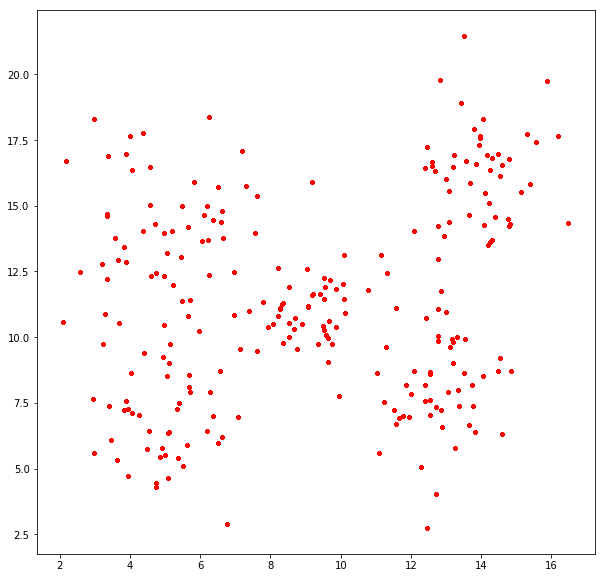

In [23]:
fig0, ax0 = plt.subplots(figsize=(10,10))
for i in range(dft.shape[0]):
    ax0.scatter(dft['X'],dft['Y'],color='r', marker = '.')

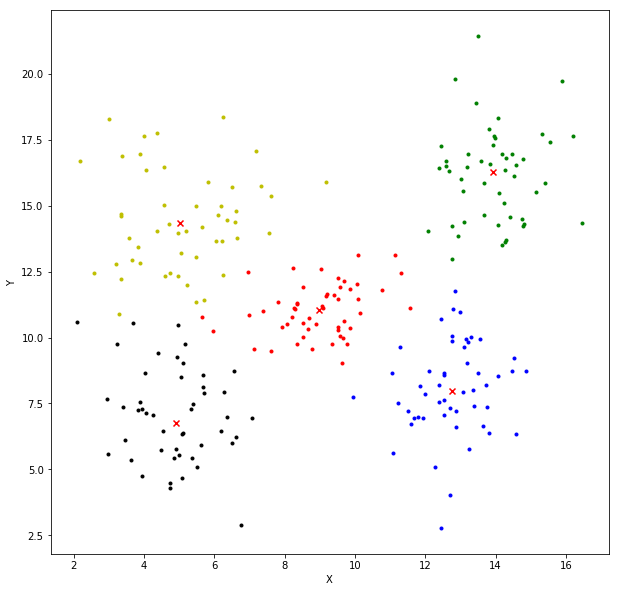

In [24]:
m, c, l, best, best_b = fc.fuzzy_c_means(dft,5)
fc.affiche_resultat(dft,c, best)

In [28]:
most_typical = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = typicality_degree(x,best,best_b,dft,'MIN')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical.append(tuple((dft.iloc[ind_max]['X'],dft.iloc[ind_max]['Y'])))
    
    

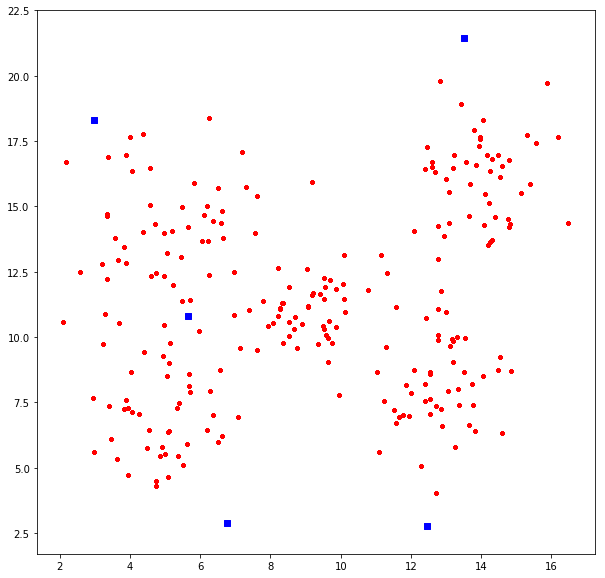

In [13]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(dft.shape[0]):
    ax0.scatter(dft['X'],dft['Y'],color='r', marker = '.')
for i in range(len(most_typical)):
    ax0.scatter(most_typical[i][0],most_typical[i][1],color='b', marker = 's')

In [25]:
most_typical_max = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = typicality_degree(x,best,best_b,dft,'MAX')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical_max.append(tuple((dft.iloc[ind_max]['X'],dft.iloc[ind_max]['Y'])))
    

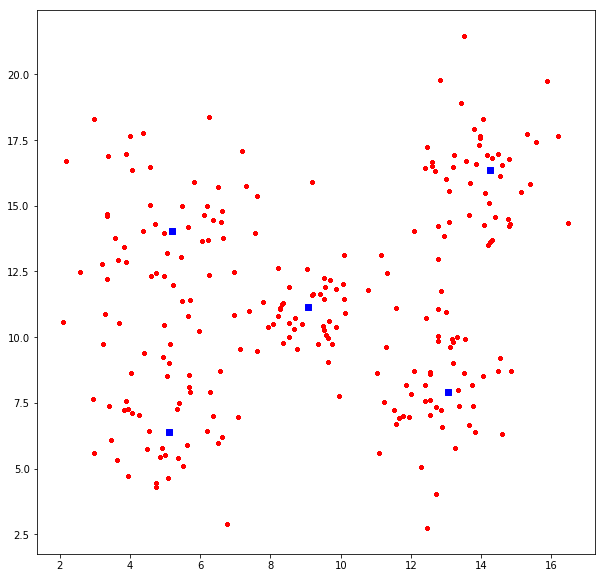

In [26]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(dft.shape[0]):
    ax0.scatter(dft['X'],dft['Y'],color='r', marker = '.')
for i in range(len(most_typical_max)):
    ax0.scatter(most_typical_max[i][0],most_typical_max[i][1],color='b', marker = 's')

In [32]:
most_typical_max_b = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = typicality_degree(x,best,best_b,df3,'MIN')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical_max_b.append(tuple((df3.iloc[ind_max]['X'],df3.iloc[ind_max]['Y'])))
    

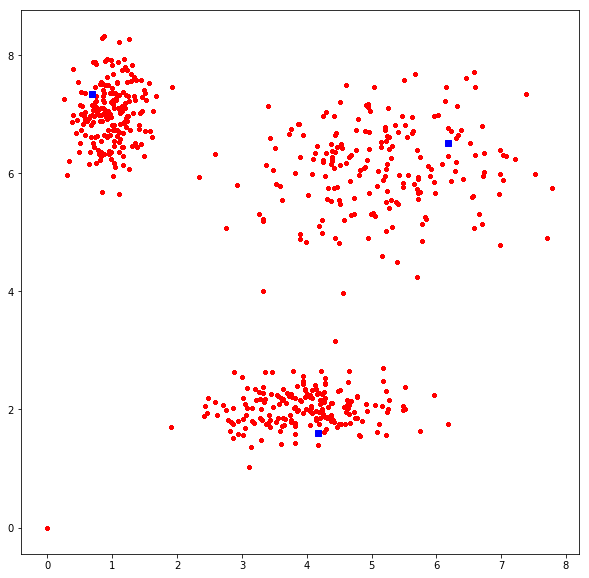

In [33]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(df3.shape[0]):
    ax0.scatter(df3['X'],df3['Y'],color='r', marker = '.')
for i in range(len(most_typical_max_b)):
    ax0.scatter(most_typical_max_b[i][0],most_typical_max_b[i][1],color='b', marker = 's')

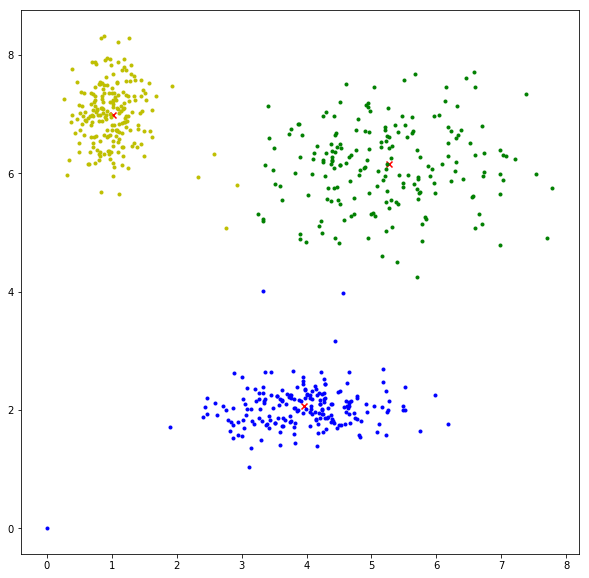

In [29]:
m, c, l, best, best_b = fc.fuzzy_c_means(df3,3)
fc.affiche_resultat(df3,c, best)

/home/hanouti/Téléchargements/Stage/iads_a/fuzz_clustering.py:126: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  for i, k in enumerate(dic):


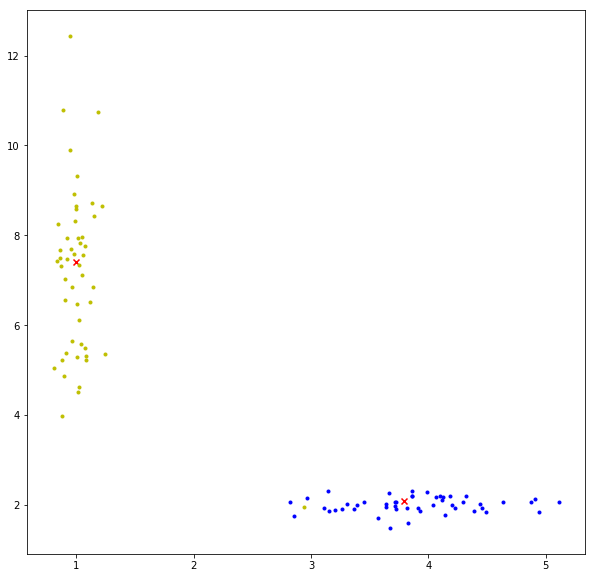

In [20]:
m, c, l, best, best_b = fc.fuzzy_c_means(df2,2)
fc.affiche_resultat(df2,c, best)

In [21]:
most_typical_max_b = []
for i in best.keys():
    t_max = -999999999
    for x in best[i]:
        t = typicality_degree(x,best,best_b,df2,'B')
        if t > t_max:
            ind_max = x
            t_max = t
    most_typical_max_b.append(tuple((df2.iloc[ind_max]['X'],df2.iloc[ind_max]['Y'])))

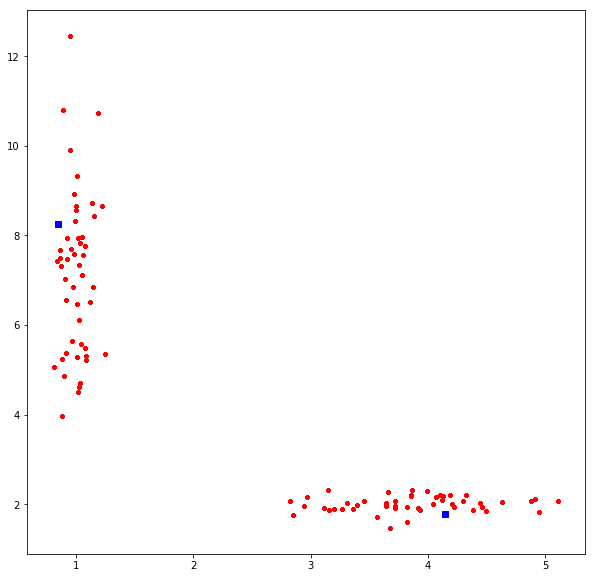

In [22]:
fig0, ax0 = plt.subplots(figsize=(10,10))

for i in range(df2.shape[0]):
    ax0.scatter(df2['X'],df2['Y'],color='r', marker = '.')
for i in range(len(most_typical_max_b)):
    ax0.scatter(most_typical_max_b[i][0],most_typical_max_b[i][1],color='b', marker = 's')

Quelques tests sur le data set iris pour mieux comprendre la notion de typicalité en s'inspirant de l'article http://webia.lip6.fr/~lesot/LesotRifqiBouchonMeunierFuzzyPrototypes08.pdf


In [165]:
iris3 = pd.read_csv('iris.csv')

In [168]:
m, c, l, aff, aff_inv = fc.fuzzy_c_means(iris3,3)

In [166]:
iris3.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [156]:
iris = iris2.drop('variety', axis=1)

In [49]:
x = iris2['petal.length'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
iris2['petal.length'] = x_scaled

In [105]:
iris2.head()

,petal.length,variety
0,1.4,Setosa
1,1.4,Setosa
2,1.3,Setosa
3,1.5,Setosa
4,1.4,Setosa


Ressemblance interne calculée en prenant en compte uniquement l'attribut petal length 

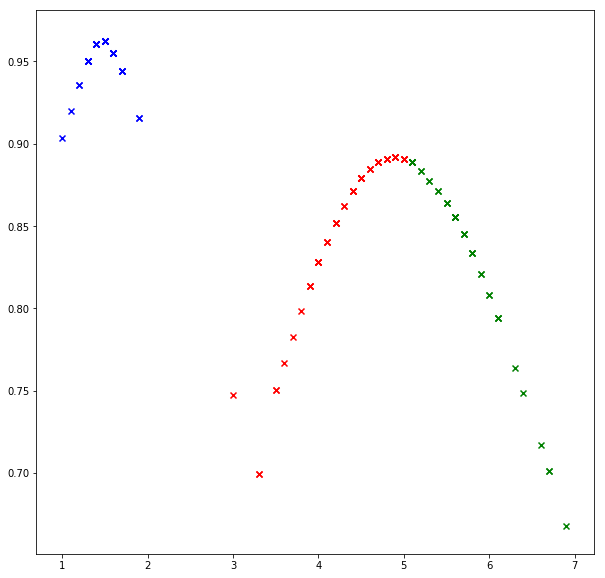

In [173]:

fig0, ax0 = plt.subplots(figsize=(10,10))
couleurs = ['b','r','g','r','k']
for i in best.keys():
    for k in best[i]:
        ax0.scatter(iris3.iloc[k]['petal.length'],rsbl[k],color=couleurs[i], marker = 'x')
plt.show()

In [7]:
centres_km, aff_km = km.kmoyennes(3,iris,0.05,100) 


/home/celina/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [28]:
from mpl_toolkits.mplot3d import Axes3D 
def affiche_resultat(df,centroides, dic):
    fig0 = plt.figure(figsize=(10,10))
    ax0 = fig0.add_subplot(111, projection='3d')
    couleurs = ['b','y','g','r','k']
    for i, k in enumerate(dic):
        data = df.loc[dic[k]]
        ax0.scatter(data['X'],data['Y'],data['Z'],color=couleurs[i], marker = 'x')
    ax0.scatter(centroides['X'],centroides['Y'],centroides['Z'],color='r',marker='s')
    plt.show()

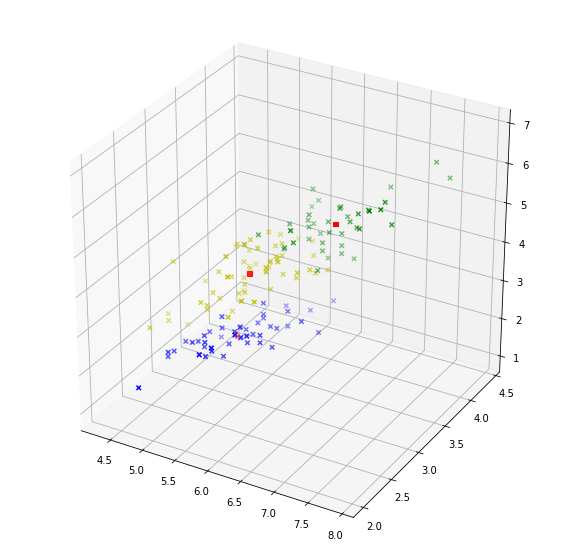

In [29]:
affiche_resultat(iris, centres_km, aff_km)

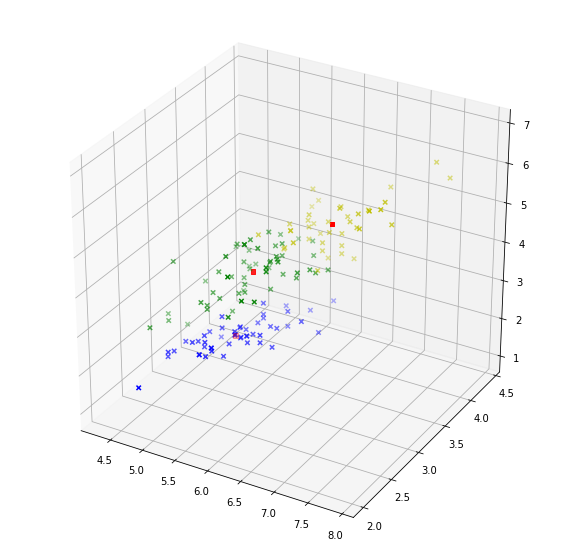

In [34]:
m, c, l, best, _ = fc.fuzzy_c_means(iris,3)
affiche_resultat(iris,c, best)

#### Chaque implementation a fait l'objet de plusieurs autres tests (calculs matriciels, vectorisation, tests sur d'autres jeux de données artificiels) qui ne sont pas présents dans ce notebook car j'ai jugé ces derniers inutiles. 